
# Diseño de software

----

## Decoradores en Python 

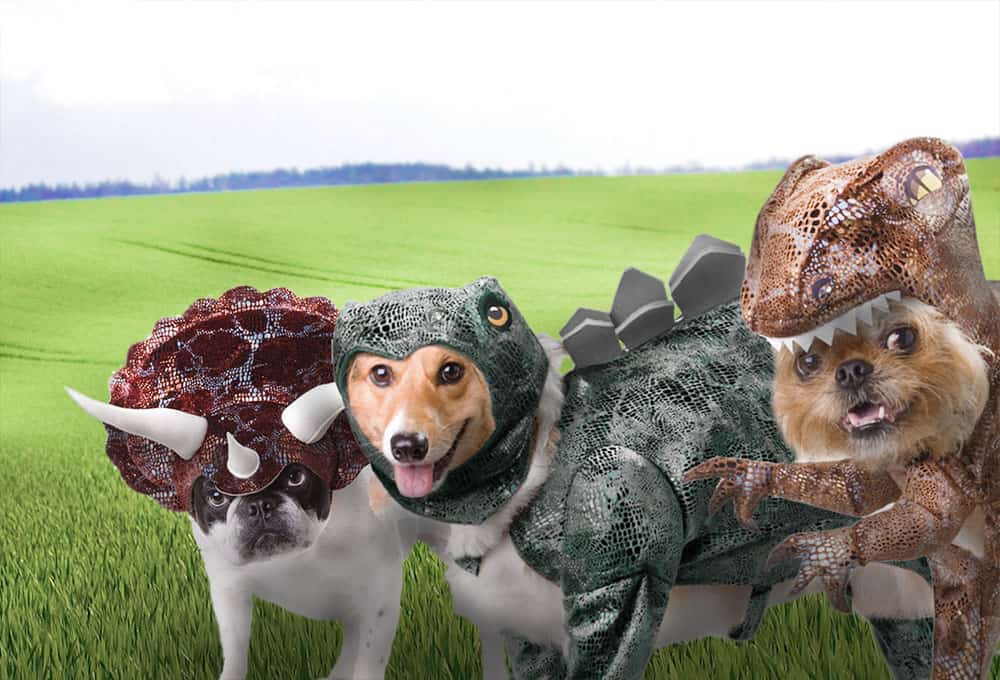

### Decoradores en Python

 - Permiten cambiar el comportamiento de una función (*sin modificarla*)
 - Reusar código fácilmente

<img align="right" width="1000" src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fvignette4.wikia.nocookie.net%2Fpowerlisting%2Fimages%2Fd%2Fdf%2FIron-Man-Transform.gif%2Frevision%2Flatest%3Fcb%3D20150514015703&f=1&nofb=1" alt="Fancy Iron Man suitup">

### Todo en Python es un objeto!

Los objetos se definen por su **Identidad**, **Tipo** y **Valor**.


In [2]:
x = 1
print(id(1), type(x))

9752160 <class 'int'>


In [3]:
x.__add__(2)

3

In [ ]:
# Otros objetos
[1, 2, 3]    # listas
5.2          # flotantes
"hola"       # strings

### Funciones
Las funciones también son objetos

In [4]:
def saludar():
    print('Hola!')

In [5]:
id(saludar)

139825484544896

In [6]:
saludar.__name__

'saludar'

In [7]:
hablar = saludar    # asignamos la funcion a otra variable

In [8]:
hablar() # la podemos llamar

Hola!


## Decorador (definición no estricta)

Un decorador es una *función* **d** que recibe como parámetro otra *función* **a** y retorna una nueva *función* **r**.

- **d**: función decoradora
- **a**: función a decorar
- **r**: función decorada

## Código

In [9]:
def d(a):
    def r(*args, **kwargs):
        # comportamiento previo a la ejecución de a
        a(*args, **kwargs)
        # comportamiento posterior a la ejecución de a
    return r


## Código

In [14]:
def d(a):
    def r(*args, **kwargs):
        print("Inicia ejecucion de", a.__name__)
        result = a(*args, **kwargs)
        print("Fin ejecucion de", a.__name__)
        return result
        
    return r


## Manipulando funciones

In [15]:
def suma(x, y):
    return x + y

In [16]:
suma(1, 2)

3

In [17]:
suma_decorada = d(suma)
suma_decorada(1, 2)

Inicia ejecucion de suma
Fin ejecucion de suma


3

## Azúcar sintáctica
A partir de Python 2.4 se incorporó la notación con  **@**  para decorar funciones.

In [18]:
def suma(x, y):
    return x + y

suma = d(suma)
suma(1,2)

Inicia ejecucion de suma
Fin ejecucion de suma


3

In [19]:
@d
def suma(x, y):
    return x + y

## Ejemplo: Medir el tiempo de ejecución

In [20]:
import time

def timer(method):
    '''Decorator to time a function runtime'''
    def wrapper(*args, **kwargs):
        
        t0 = time.time()
        output = method(*args, **kwargs)
        dt = time.time() - t0
        
        print(f'<{method.__name__} finished in {dt} seconds>')
        return output
    
    return wrapper

In [26]:
@timer
def fib(n):
    values = [0, 1]
    while values[-2] < n:
        values.append(values[-2] + values[-1])
        time.sleep(1)
    return values

In [25]:
lista = fib(1000)
lista

<fib finished in 17.01420545578003 seconds>


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]

## Decoradores encadenados
Similar al concepto matemático de componer funciones.

In [2]:
@registrar_uso
@medir_tiempo_ejecucion
def mi_funcion(algunos, argumentos):
    # cuerpo de la funcion
    ...

NameError: name 'registrar_uso' is not defined

In [ ]:
def mi_funcion(algunos, argumentos):
    # cuerpo de la funcion
    
mi_funcion = registrar_uso(medir_tiempo_ejecucion(mi_funcion))

## Decoradores con parámetros?
 - Se denominan *Fábrica de decoradores*
 - Permiten tener decoradores más flexibles.
 - Ejemplo: un decorador que fuerce el tipo de retorno de una función

In [28]:
def to_string(user_function):
    def inner(*args, **kwargs):
        r = user_function(*args, **kwargs)
        return str(r)
    return inner

In [29]:
@to_string
def count():
    return 42
count()

'42'

## Envolvemos el decorador en una función externa 

In [115]:
def typer(t):
    def decorator(user_function):
        def inner(*args, **kwargs):
            r = user_function(*args, **kwargs)
            return t(r)
        return inner
    return decorator

In [116]:
@typer(str)
def count(x, y):
    return 42
count()

'42'

In [118]:
@typer(round)
def edad():
    return 25.5
edad()

26

## Clases decoradoras
 - Decoradores con estado
 - Código mejor organizado

In [34]:
class Decorador:
    def __init__(self, a):
        self.a = a
        self.variable = None
        
    def __call__(self, *args, **kwargs):
        # comportamiento previo a la ejecución de a
        r = self.a(*args, **kwargs)
        # comportamiento posterior a la ejecución de a
        return r

In [35]:
@Decorador
def edad():
    return 25.5

edad()   # se ejecuta el método __call__

25.5

## Decoradores (definición más estricta)
Un decorador es un *callable* **d** que recibe como parámetro un *objeto* **a** y retorna un nuevo *objeto* **r** (por lo general del mismo tipo que el orginal o con su misma interfaz).

- **d**: clase que defina el método <code>\_\_call\_\_</code>
- **a**: cualquier objeto
- **r**: objeto decorado

## Decorar clases
Identidad

In [ ]:
def identidad(C):
    return C

In [ ]:
@identidad
class A:
    pass

A()

## Decorar clases
Cambiar totalmente el comportamiento de una clase

In [36]:
def corromper(C):
    return "hola"

In [37]:
@corromper
class A:
    pass

A()

TypeError: 'str' object is not callable

## Decorar clases
Reemplazar con una nueva clase

In [38]:
def reemplazar_con_X(C):
    class X():
        pass
    return X

In [39]:
@reemplazar_con_X
class MiClase():
    pass

MiClase

__main__.reemplazar_con_X.<locals>.X

## Algunos decoradores comunes
La librería estándar de Python incluye <code>classmethod</code>, <code>staticmethod</code>, <code>property</code>

In [156]:
class Student:

    def __init__(self, first_name, last_name):
        self.first_name = first_name.capitalize()
        self.last_name = last_name.capitalize()
        self.full_name = ' '.join([self.first_name, self.last_name])
    
    @property
    def name(self):
        return self.full_name
        
    @name.setter
    def name(self, new_name):
        self.full_name = new_name.title()
    
    @classmethod
    def from_string(cls, name_str):
        first_name, last_name = map(str, name_str.split())
        student = cls(first_name, last_name)
        return student

    @staticmethod
    def is_full_name(name_str):
        names = name_str.split(' ')
        return len(names) > 1


In [157]:
s = Student('maria', 'perez')
s.name = 'mariana perez'
s.name

'Mariana Perez'

In [158]:
Student.from_string('José Gonzalez')

In [159]:
Student.is_full_name('JoséGonzalez')

False